In [13]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/book-ratings/ratings.csv
/kaggle/input/bookcrossing-dataset/Books Data with Category Language and Summary/Preprocessed_data.csv
/kaggle/input/bookcrossing-dataset/Book reviews/Book reviews/BX_Books.csv
/kaggle/input/bookcrossing-dataset/Book reviews/Book reviews/BX-Book-Ratings.csv
/kaggle/input/bookcrossing-dataset/Book reviews/Book reviews/BX-Users.csv


## SURPRISE
### Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data.
<font size=4><b>Surprise was designed with the following purposes in mind:
### 1.Give users perfect control over their experiments.
### 2.Alleviate the pain of Dataset handling. Users can use both built-in datasets (Movielens, Jester), and their own custom datasets.
### 3.rovide various ready-to-use prediction algorithms such as baseline algorithms, neighborhood methods, matrix factorization-based ( SVD, PMF, SVD++, NMF), and many others. Also, various similarity measures (cosine, MSD, pearson…) are built-in.
### 4.Make it easy to implement new algorithm ideas.
### 5.Provide tools to evaluate, analyse and compare the algorithms’ performance. Cross-validation procedures can be run very easily using powerful CV iterators (inspired by scikit-learn excellent tools), as well as exhaustive search over a set of parameters.

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from surprise import Dataset
from surprise import Reader
from surprise import SVD,accuracy  
from surprise.model_selection import cross_validate
import missingno as msno

In [3]:
df=pd.read_csv('../input/book-ratings/ratings.csv')

In [4]:
df

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


### Checking for missing values

<AxesSubplot:>

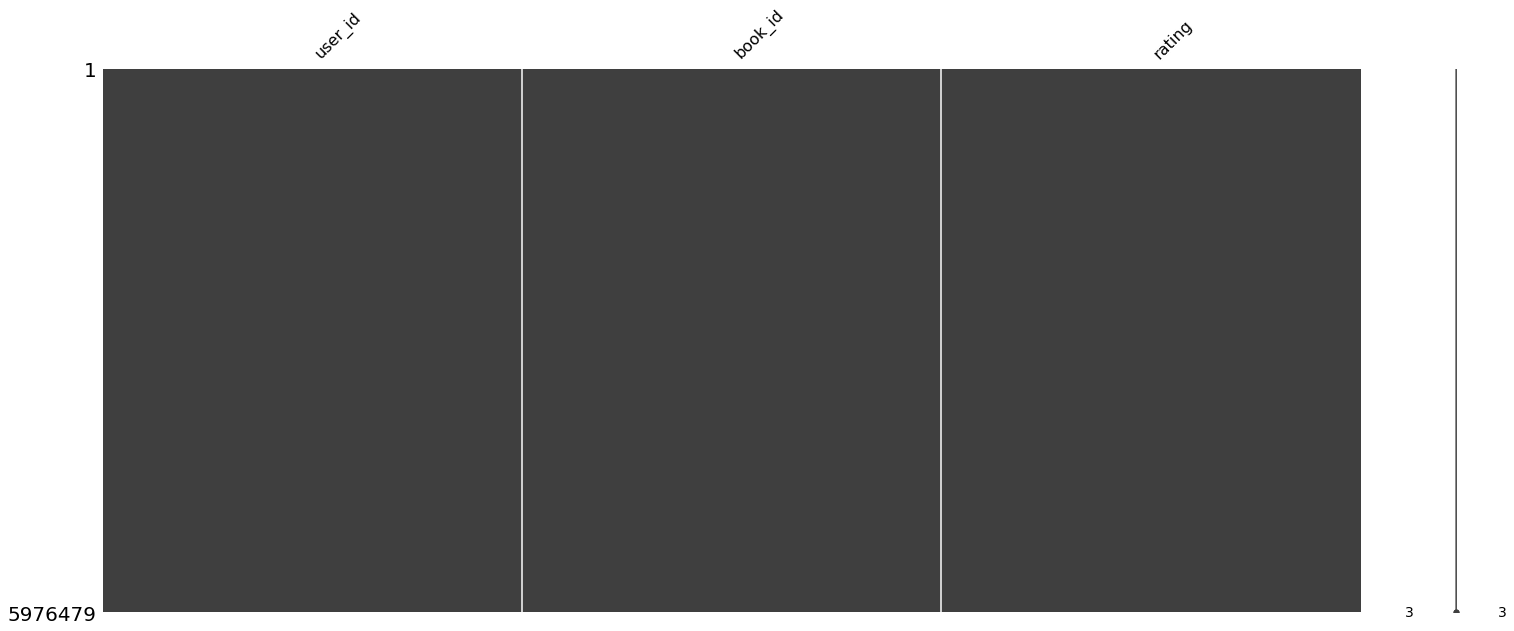

In [5]:
msno.matrix(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB


In [7]:
df.shape

(5976479, 3)

<font size=4><b>Checking what rating has been provided most by the user</b><font>

<AxesSubplot:xlabel='rating', ylabel='count'>

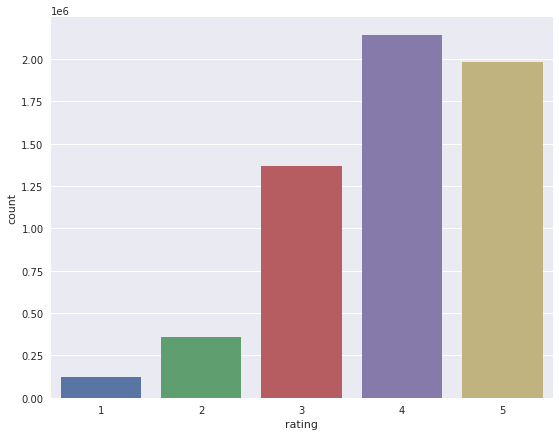

In [14]:
plt.style.use('seaborn')
plt.figure(figsize=(9,7))
sns.countplot(x='rating',data=df)

<font size=4><b>Checking distinct users</b></font>

In [9]:
df['user_id'].nunique()

53424

### Reader Class.
<br>
The Reader class is used to parse a file containing ratings. The default format in which it accepts data is that each rating is stored in a      separate line in the order user item rating. This order and the separator can be configured using parameters:
<br>
 1. line_format is a string that stores the order of the data with field names separated by a space, as in "item user rating".
<br>
 2. sep is used to specify separator between fields, such as ','.
<br>
 3. rating_scale is used to specify the rating scale. The default is (1, 5).
<br>
 4. skip_lines is used to indicate the number of lines to skip at the beginning of the file. The default is 0.
<br>

### Dataset Module
<br>
The Dataset module is used to load data from files, Pandas dataframes, or even built-in datasets available for experimentation.

In [10]:
reader=Reader(rating_scale=(1,5))

data=Dataset.load_from_df(df,reader)

algo=SVD()

cross_validate(algo,data,cv=3)


{'test_rmse': array([0.84100942, 0.84146373, 0.84180221]),
 'test_mae': array([0.65085447, 0.65163261, 0.65137744]),
 'fit_time': (376.3707356452942, 383.489572763443, 386.19174885749817),
 'test_time': (31.80077290534973, 32.58859634399414, 28.97731351852417)}

### Predict the rating of a book with user_id=2 and book_id=4081

In [12]:
algo.predict(2,4081,r_ui=4)

Prediction(uid=2, iid=4081, r_ui=4, est=3.71083825647629, details={'was_impossible': False})